In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [24]:
sacramento = pd.read_csv("./dataset/sacramento.csv")
sacramento

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Residential,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Residential,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Residential,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Residential,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Residential,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779
...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Residential,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Residential,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Residential,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Residential,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391


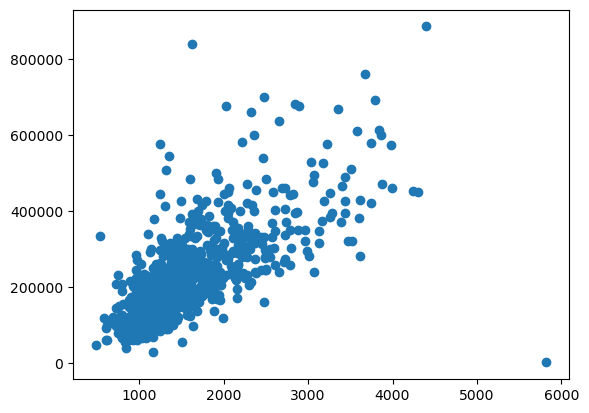

In [25]:
# Plot the relationship between x and y
plt.scatter(sacramento["sq__ft"], sacramento["price"], label='House size vs House price')

In [ ]:
# model(response variable ~ predictor, data).fit()

In [26]:
#simple linear regression
model = smf.ols("price ~ sq__ft", data = sacramento).fit()

In [27]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     753.2
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          7.67e-118
Time:                        18:15:46   Log-Likelihood:                -10406.
No. Observations:                 814   AIC:                         2.082e+04
Df Residuals:                     812   BIC:                         2.083e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.021e+04   7865.211      3.841      0.0

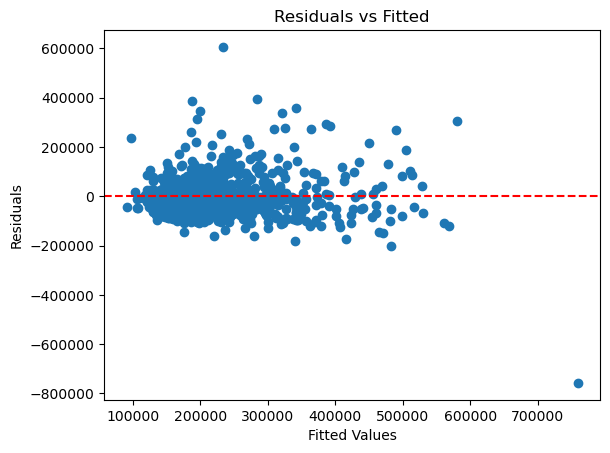

In [28]:
# Residual plots
fitted = model.fittedvalues
residuals = model.resid


# Homoscedasticity: Residuals vs. Fitted
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


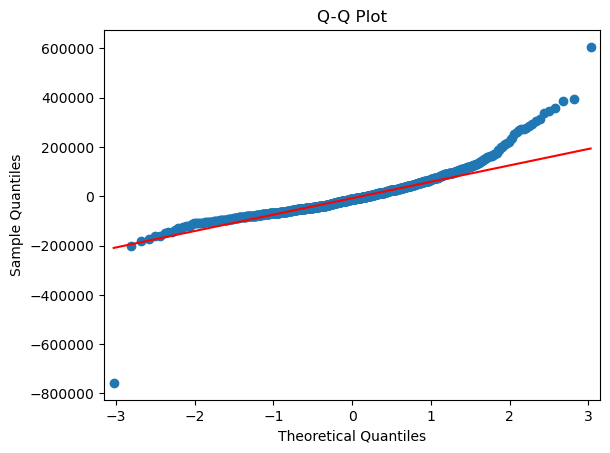

In [29]:
sm.qqplot(residuals, line = 'q')
plt.title('Q-Q Plot')
plt.show()


In [30]:
#multivariable linear regression

multi_model = smf.ols("price ~ sq__ft + beds", data = sacramento).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     381.0
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          2.15e-117
Time:                        18:32:08   Log-Likelihood:                -10404.
No. Observations:                 814   AIC:                         2.081e+04
Df Residuals:                     811   BIC:                         2.083e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.04e+04   1.19e+04      4.221      0.0

In [32]:
sacramento["type"].unique()

array(['Residential', 'Multi-Family', 'Condo'], dtype=object)

In [33]:
sacramento_encoded = pd.get_dummies(sacramento, columns=["type"], drop_first=True)

In [34]:
sacramento_encoded

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,1 KENNELFORD CIR,SACRAMENTO,95823,CA,3,2,1144,Mon May 19 00:00:00 EDT 2008,200345,38.464520,-121.427606,0,1
1,10 SEA FOAM CT,SACRAMENTO,95831,CA,3,3,2052,Wed May 21 00:00:00 EDT 2008,415000,38.487885,-121.545947,0,1
2,100 CHELSEA CT,FOLSOM,95630,CA,3,2,1905,Mon May 19 00:00:00 EDT 2008,500000,38.694350,-121.177259,0,1
3,100 REBECCA WAY,FOLSOM,95630,CA,3,2,2185,Wed May 21 00:00:00 EDT 2008,344250,38.684790,-121.149199,0,1
4,100 TOURMALINE CIR,SACRAMENTO,95834,CA,5,3,3076,Mon May 19 00:00:00 EDT 2008,240000,38.634370,-121.510779,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,9880 IZILDA CT,SACRAMENTO,95829,CA,5,4,3863,Fri May 16 00:00:00 EDT 2008,598695,38.453260,-121.325730,0,1
810,993 MANTON CT,GALT,95632,CA,4,3,2307,Tue May 20 00:00:00 EDT 2008,300000,38.272942,-121.289148,0,1
811,9937 BURLINE ST,SACRAMENTO,95827,CA,3,2,1092,Fri May 16 00:00:00 EDT 2008,150000,38.559641,-121.323160,0,1
812,9949 NESTLING CIR,ELK GROVE,95757,CA,3,2,1543,Fri May 16 00:00:00 EDT 2008,275000,38.397455,-121.468391,0,1


In [35]:
#rename columns to replace - with _ for ease
sacramento_encoded.columns = sacramento_encoded.columns.str.replace("-","_")


In [43]:
#multivariable with category model
multi_cat_model = smf.ols("price ~ sq__ft*type_Multi_Family + sq__ft*type_Residential", data = sacramento_encoded).fit()

In [44]:
print(multi_cat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     157.0
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          1.66e-116
Time:                        18:54:12   Log-Likelihood:                -10397.
No. Observations:                 814   AIC:                         2.081e+04
Df Residuals:                     808   BIC:                         2.083e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

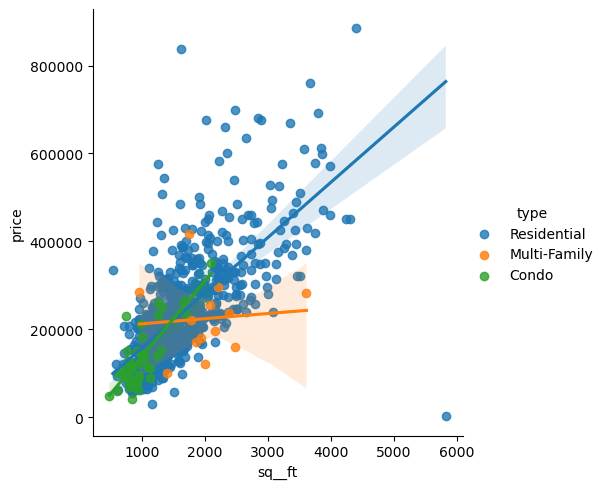

In [46]:
import seaborn
seaborn.lmplot(x="sq__ft", 
               y="price", 
               hue="type", 
               data=sacramento)
